In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("airfoil_self_noise.dat",sep="\t",header=None)

In [23]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [24]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [25]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [26]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

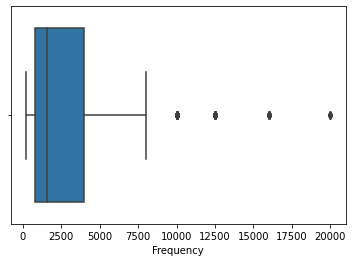

In [27]:

sns.boxplot(df.iloc[:,0])


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle of attack'>

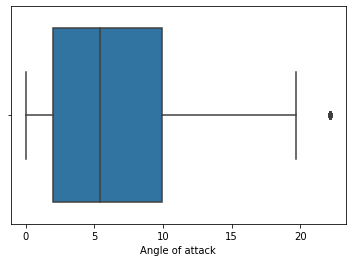

In [28]:
sns.boxplot(df.iloc[:,1])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chord length'>

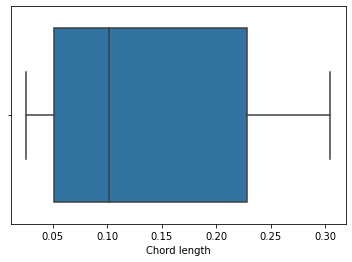

In [29]:
sns.boxplot(df.iloc[:,2])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Free-stream velocity'>

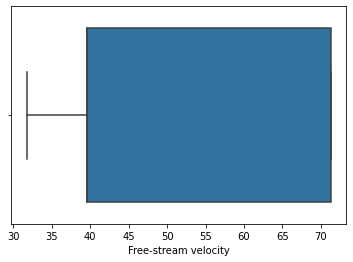

In [30]:

sns.boxplot(df.iloc[:,3])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suction side'>

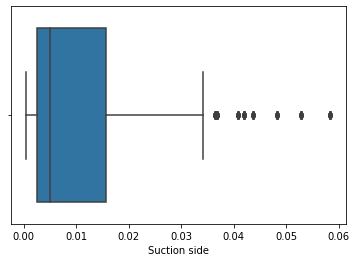

In [31]:
sns.boxplot(df.iloc[:,4])

In [32]:
df=df[df[df.columns[4]]<0.03]

In [33]:
filt=(df['Frequency']<=8000)
df=df[filt]

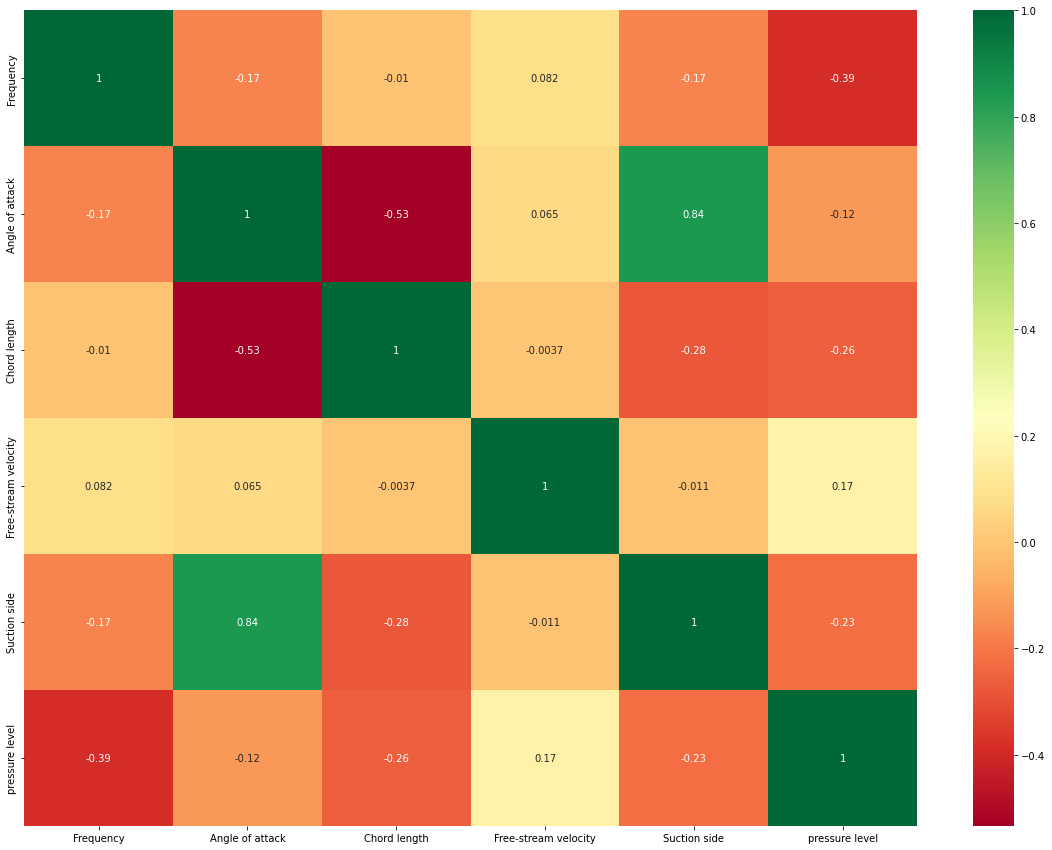

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [35]:

min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,0.076923,0.000000,1.000000,1.000000,0.079158,0.549235
1,0.102564,0.000000,1.000000,1.000000,0.079158,0.518749
2,0.134615,0.000000,1.000000,1.000000,0.079158,0.541613
3,0.179487,0.000000,1.000000,1.000000,0.079158,0.591610
4,0.230769,0.000000,1.000000,1.000000,0.079158,0.587647
...,...,...,...,...,...,...
1258,0.294872,0.400901,0.272727,0.199495,0.421867,0.335498
1259,0.378205,0.400901,0.272727,0.199495,0.421867,0.340376
1260,0.487179,0.400901,0.272727,0.199495,0.421867,0.244955
1261,0.615385,0.400901,0.272727,0.199495,0.421867,0.149229


In [36]:
X=df_minmax.iloc[:,0:-1]
Y=df_minmax.iloc[:,-1]

In [42]:
for i in range(100):    
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

    des=DecisionTreeRegressor()
    des.fit(X_train,Y_train)
    score_dc=des.score(X_test,Y_test)

    rf=RandomForestRegressor()
    rf.fit(X_train,Y_train)
    rf_score=rf.score(X_test,Y_test)
    print("Dec_tree_score: ",score_dc,'\n',"Random_forest_score: ",rf_score)

Dec_tree_score:  0.7877678594093105 
 Random_forest_score:  0.9068382616889304
Dec_tree_score:  0.7884358755869308 
 Random_forest_score:  0.9025918671159192
Dec_tree_score:  0.7856186476429342 
 Random_forest_score:  0.9029625472554033
Dec_tree_score:  0.7813223930658446 
 Random_forest_score:  0.9038432643453695
Dec_tree_score:  0.7873243625777184 
 Random_forest_score:  0.9017608002521733
Dec_tree_score:  0.781239389465546 
 Random_forest_score:  0.9036192824894276
Dec_tree_score:  0.7835046165090934 
 Random_forest_score:  0.9066907491708158
Dec_tree_score:  0.7716763790843367 
 Random_forest_score:  0.9025066085060958
Dec_tree_score:  0.789929221391271 
 Random_forest_score:  0.9044475152250977
Dec_tree_score:  0.7757429352695708 
 Random_forest_score:  0.900284595579142
Dec_tree_score:  0.7903761057967197 
 Random_forest_score:  0.9005711627544326
Dec_tree_score:  0.7898386910443257 
 Random_forest_score:  0.9003888110591551
Dec_tree_score:  0.7866432974603874 
 Random_forest_sco

In [43]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00547/


# https://archive.ics.uci.edu/ml/machine-learning-databases/00547/